In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
# Loading the MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
type(x_train)

numpy.ndarray

In [4]:
# Shape of the numpy array
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
# x_train => (60000, 28, 28) => 60000 images & each image has a dimension of 28 x 28 pixel size

# Training data = 60 000
# Test data = 10 000
# Image dimension = 28 x 28
# Grayscale Image -> 1 channel

In [6]:
# Printing the n-th image
n = 49
print(x_train[n])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  63 114 238 253 253 253
  255  27   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  98 225 240 253 252 252 252 252
  253 228 225 130  38   0   0   0   0   0]
 [  0   0   0  26   6   0   0   0   0  67 240 252 252 253 252 252 252 252
  253 252 252 252 112   0   0   0   0   0]
 [  0   0   0 101  24   0   0   0   0  28 121 249 239 253 236 20

In [7]:
print(x_train[n].shape)

(28, 28)


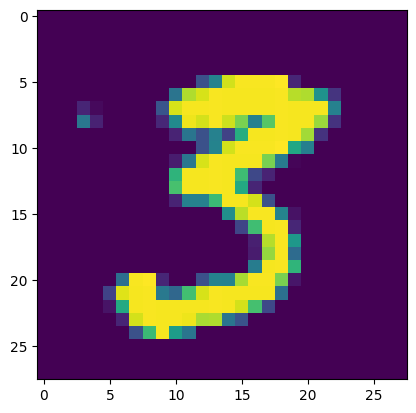

In [8]:
# Displaying the image
plt.imshow(x_train[n])
plt.show()

In [9]:
# print the corresponding label
print(y_train[n])

3


In [10]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [11]:
# unique values in y_train
print(np.unique(y_train))

# unique values in y_test
print(np.unique(y_test))

# We can use these labels as such or  we can also apply One Hot Encoding

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [12]:
# All the images have the same dimention in this dataset, if not, we have to resize all the images to a common dimension

# Scaling the values / Normalization
x_train = x_train/255
x_test = x_test/255

In [13]:
print(x_train[n])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [225]:
# Building the Neural Network

# Setting up the layers of the Neural Network
model = keras.Sequential([
    # Input layer
    keras.layers.Flatten(input_shape=(28,28)),   # all the values are in array form. it cannot be fed. we have yo feed iy in a sigle line. 
    # keras.layers.Flatten(input_shape(28,28,3))  => this indicates that it is a RGM image, if 3 is not given, it is grayscale image
    
    # Hidden layers
    keras.layers.Dense(50, activation='relu'),     # connecting the layer with previous and next layer
    keras.layers.Dense(50, activation='relu'),

    # Output layer
    keras.layers.Dense(10, activation='sigmoid')
])


c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [226]:
# Compiling Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [227]:
# Training the Neural Network
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8505 - loss: 0.5146
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9547 - loss: 0.1493
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9671 - loss: 0.1086
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9753 - loss: 0.0837
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9800 - loss: 0.0672
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9835 - loss: 0.0560
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9854 - loss: 0.0474
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9873 - loss: 0.0412
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9895 - loss: 0.0356
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9901 - loss: 0.0305


In [175]:
# training data accuracy is 95.63% 

In [228]:
loss,accuracy = model.evaluate(x_test, y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.9628 - loss: 0.1344
0.9674000144004822


In [177]:
# Test data accuracy = 95.3999%

In [229]:
print(x_test.shape)

(10000, 28, 28)


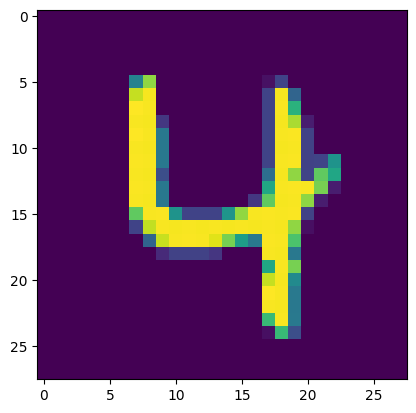

In [230]:
# first data point in x_test
plt.imshow(x_test[n])
plt.show()

In [231]:
print(y_test[n])

4


In [232]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [233]:
print(y_pred.shape)

(10000, 10)


In [234]:
print(y_pred[n])

[2.8533394e-05 2.1592531e-04 5.7354383e-04 2.5163384e-04 1.0000000e+00
 3.4486404e-06 2.4039093e-02 3.3298245e-01 4.7602418e-05 9.7803175e-01]


In [235]:
# model.predict() gives the prediction of each class for that data point

# Converting the prediction probabilities to class label
label_for_first_image = np.argmax(y_pred[n])
print(label_for_first_image)

4


In [236]:
# coverting the prediction probability to class label for all test data points

y_pred_labels= [np.argmax(1) for i in y_pred]
print(y_pred_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [237]:
print(y_pred)

[[6.9499634e-02 3.1812584e-03 7.4771777e-02 ... 9.9999976e-01
  3.5500970e-02 9.7456354e-01]
 [2.8509954e-03 8.7338507e-01 9.9999863e-01 ... 2.9075371e-05
  2.3343461e-02 1.0993920e-11]
 [1.1188393e-04 9.9935400e-01 3.6735851e-01 ... 6.9681846e-02
  1.9209509e-01 2.4943007e-04]
 ...
 [1.0540724e-09 5.2657863e-03 2.0605106e-07 ... 1.1860222e-01
  8.7468415e-02 9.9827832e-01]
 [3.3853098e-06 1.0643394e-03 2.8277702e-10 ... 2.7501519e-04
  9.9996358e-01 6.0428642e-06]
 [2.1404421e-01 5.9563243e-13 9.3831784e-07 ... 2.9733858e-14
  5.2443776e-02 4.6241507e-07]]


In [187]:
# y_test => True labels
# y_pred_labels => Predicted labels

In [238]:
# Confudion matrix
conf_mat = confusion_matrix(y_test, y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 980    0    0    0    0    0    0    0    0    0]
 [1135    0    0    0    0    0    0    0    0    0]
 [1032    0    0    0    0    0    0    0    0    0]
 [1010    0    0    0    0    0    0    0    0    0]
 [ 982    0    0    0    0    0    0    0    0    0]
 [ 892    0    0    0    0    0    0    0    0    0]
 [ 958    0    0    0    0    0    0    0    0    0]
 [1028    0    0    0    0    0    0    0    0    0]
 [ 974    0    0    0    0    0    0    0    0    0]
 [1009    0    0    0    0    0    0    0    0    0]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted labels')

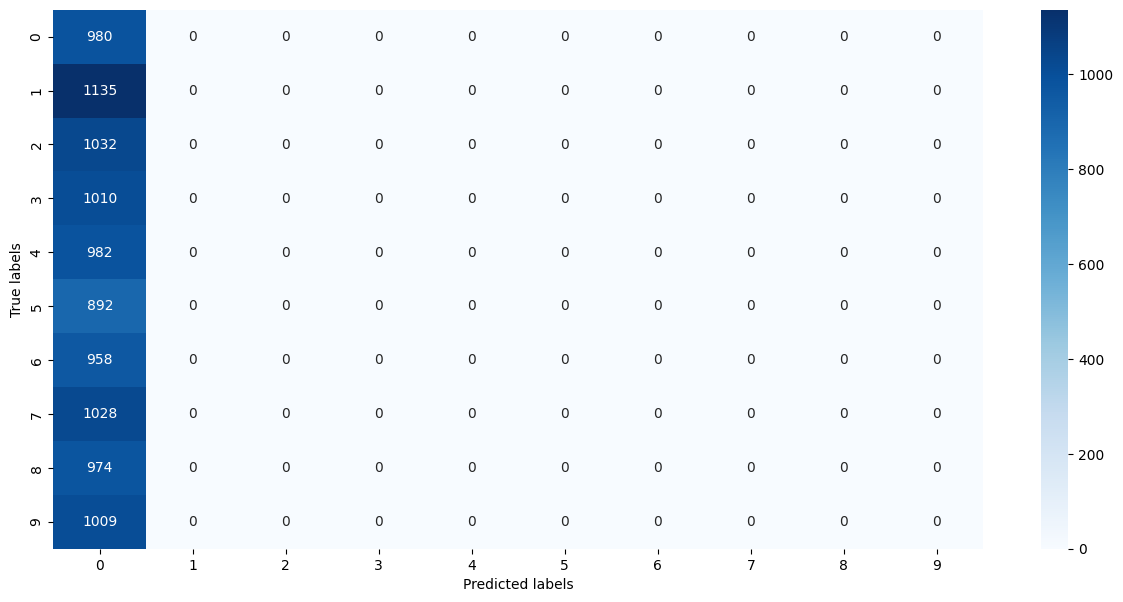

In [239]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')

In [240]:
# Building a Predictive system
input_image_path = 'mnist_digit_3.png'
input_image = cv2.imread(input_image_path)
grayscale_image = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [253]:
type(grayscale_image)  #

numpy.ndarray

In [254]:
print(grayscale_image)  #

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


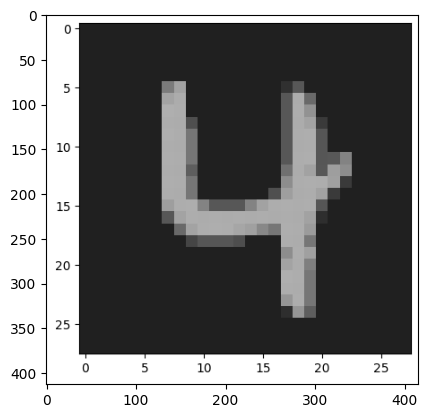

In [255]:
plt.imshow(grayscale_image,cmap='gray')
plt.show()

In [256]:
print(input_image.shape)
print(grayscale_image.shape)

(413, 416, 3)
(413, 416)


In [257]:
input_image_resize = cv2.resize(grayscale_image,(28,28))

In [258]:
input_image_resize.shape

(28, 28)

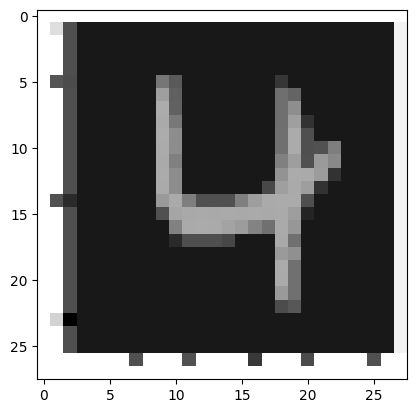

In [259]:
plt.imshow(input_image_resize,cmap='gray')
plt.show()

In [260]:
input_image_resize = input_image_resize/255

In [261]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])  # predicting for only one image

In [262]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[1.6564639e-10 1.1088153e-12 9.9563902e-10 9.9979317e-01 6.1102212e-23
  4.0541306e-07 6.4935720e-20 1.0000000e+00 8.6687749e-07 1.0000000e+00]]


In [263]:
input_pred_label = np.argmax(input_prediction)

In [264]:
print(input_pred_label)

7


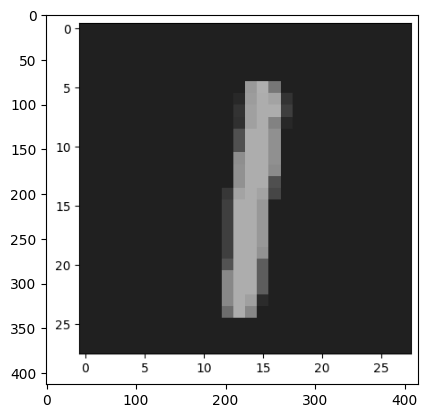

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The Handwritten Digit is recognized as  3


In [268]:
# Predictive system

input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

grayscale_image = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

plt.imshow(grayscale_image,cmap='gray')
plt.show()

#cv2.imshow(input_image)

input_image_resize = cv2.resize(grayscale_image, (28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognized as ', input_pred_label)
